In [1]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(len(os.listdir('Garbage_classification/Garbage_classification/cardboard/')))
print(len(os.listdir('Garbage_classification/Garbage_classification/glass/')))
print(len(os.listdir('Garbage_classification/Garbage_classification/metal/')))
print(len(os.listdir('Garbage_classification/Garbage_classification/paper/')))
print(len(os.listdir('Garbage_classification/Garbage_classification/plastic/')))
print(len(os.listdir('Garbage_classification/Garbage_classification/trash/')))

403
501
410
594
482
137


In [2]:
try:
    os.mkdir('Garbage_classification/training')
    os.mkdir('Garbage_classification/training/cardboard')
    os.mkdir('Garbage_classification/training/glass')
    os.mkdir('Garbage_classification/training/metal')
    os.mkdir('Garbage_classification/training/paper')
    os.mkdir('Garbage_classification/training/plastic')
    os.mkdir('Garbage_classification/training/trash')
    os.mkdir('Garbage_classification/testing')
    os.mkdir('Garbage_classification/testing/cardboard')
    os.mkdir('Garbage_classification/testing/glass')
    os.mkdir('Garbage_classification/testing/metal')
    os.mkdir('Garbage_classification/testing/paper')
    os.mkdir('Garbage_classification/testing/plastic')
    os.mkdir('Garbage_classification/testing/trash')
except OSError:
    pass

In [3]:
import random
from shutil import copyfile

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        name = SOURCE + filename
        if(os.path.getsize(name)>0):
            files.append(filename)
        else:
            continue
    train_length = int(len(files)*SPLIT_SIZE)
    test_length = int(len(files)-train_length)
    files = random.sample(files, len(files))
    train_set = files[0:train_length]
    test_set = files[-test_length:]
    
    for filename in train_set:
        source = SOURCE + filename
        dest = TRAINING + filename
        copyfile(source , dest )
    for filename in test_set:
        source = SOURCE + filename
        dest = TESTING + filename
        copyfile(source , dest )

Cardboard_Source = 'Garbage_classification/Garbage_classification/cardboard/'
Glass_Source = 'Garbage_classification/Garbage_classification/glass/'
Metal_Source = 'Garbage_classification/Garbage_classification/metal/'
Paper_Source = 'Garbage_classification/Garbage_classification/paper/'
Plastic_Source = 'Garbage_classification/Garbage_classification/plastic/'
Trash_Source = 'Garbage_classification/Garbage_classification/trash/'



Cardboard_Train = 'Garbage_classification/training/cardboard/'
Glass_Train = 'Garbage_classification/training/glass/'
Metal_Train = 'Garbage_classification/training/metal/'   
Paper_Train = 'Garbage_classification/training/paper/'
Plastic_Train = 'Garbage_classification/training/plastic/'
Trash_Train = 'Garbage_classification/training/trash/'

Cardboard_Test = 'Garbage_classification/testing/cardboard/'
Glass_Test = 'Garbage_classification/testing/glass/'
Metal_Test = 'Garbage_classification/testing/metal/'
Paper_Test = 'Garbage_classification/testing/paper/'
Plastic_Test = 'Garbage_classification/testing/plastic/'
Trash_Test = 'Garbage_classification/testing/trash/'


split_size = .9
split_data(Cardboard_Source, Cardboard_Train, Cardboard_Test, split_size)
split_data(Glass_Source, Glass_Train,Glass_Test, split_size)
split_data(Metal_Source, Metal_Train, Metal_Test, split_size)
split_data(Paper_Source, Paper_Train, Paper_Test, split_size)
split_data(Plastic_Source, Plastic_Train, Plastic_Test, split_size)
split_data(Trash_Source, Trash_Train, Trash_Test, split_size)


In [4]:
print(len(os.listdir('Garbage_classification/training')))
print(len(os.listdir('Garbage_classification/training/cardboard')))
print(len(os.listdir('Garbage_classification/training/glass')))
print(len(os.listdir('Garbage_classification/training/metal')))
print(len(os.listdir('Garbage_classification/training/paper')))
print(len(os.listdir('Garbage_classification/training/plastic')))
print(len(os.listdir('Garbage_classification/training/trash')))
print(len(os.listdir('Garbage_classification/testing')))
print(len(os.listdir('Garbage_classification/testing/cardboard')))
print(len(os.listdir('Garbage_classification/testing/glass')))
print(len(os.listdir('Garbage_classification/testing/metal')))
print(len(os.listdir('Garbage_classification/testing/paper')))
print(len(os.listdir('Garbage_classification/testing/plastic')))
print(len(os.listdir('Garbage_classification/testing/trash')))


6
396
495
407
586
479
136
6
75
96
79
112
95
27


In [5]:
TRAINING_DIR = 'Garbage_classification/training/'
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                   batch_size = 10,
                                                   class_mode = 'sparse',
                                                   target_size = (150,150))

VALIDATION_DIR = 'Garbage_classification/testing/'
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                       rotation_range = 40,
                                       width_shift_range = 0.2,
                                       height_shift_range = 0.2,
                                       shear_range = 0.2,
                                       zoom_range = 0.2,
                                       horizontal_flip = True,
                                       fill_mode = 'nearest')

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                             batch_size = 10,
                                                             class_mode = 'sparse',
                                                             target_size = (150,150))

Found 2499 images belonging to 6 classes.
Found 484 images belonging to 6 classes.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc']) 

In [12]:
history = model.fit_generator(train_generator, epochs = 50, verbose = 1, validation_data = validation_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 49 steps
Epoch 1/50
250/250 [==============================] - 69s 277ms/step - loss: 0.5342 - acc: 0.8047 - val_loss: 0.5309 - val_acc: 0.8182
Epoch 2/50
250/250 [==============================] - 75s 301ms/step - loss: 0.5558 - acc: 0.7971 - val_loss: 0.5493 - val_acc: 0.8244
Epoch 3/50
250/250 [==============================] - 77s 307ms/step - loss: 0.5533 - acc: 0.7983 - val_loss: 0.5725 - val_acc: 0.7975
Epoch 4/50
250/250 [==============================] - 79s 314ms/step - loss: 0.5142 - acc: 0.8171 - val_loss: 0.5691 - val_acc: 0.7955
Epoch 5/50
250/250 [==============================] - 82s 326ms/step - loss: 0.5370 - acc: 0.7983 - val_loss: 0.5168 - val_acc: 0.8244
Epoch 6/50
250/250 [==============================] - 88s 353ms/step - loss: 0.5480 - acc: 0.8043 - val_loss: 0.5369 - val_acc: 0.8161
Epoch 7/50
250/250 [==============================] - 79s 316ms/step - loss: 0.5481 - acc: 0.8007

In [14]:
model.save('garbage(adam).h5')

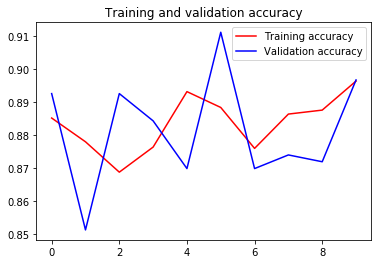

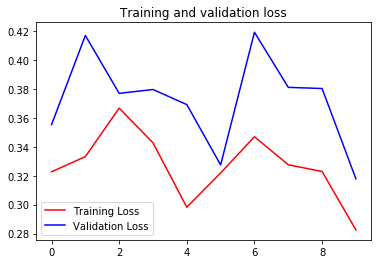

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
model = tf.keras.models.load_model('garbage(adam).h5')

In [21]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate = 1e-3,
                                                        decay_steps = 5000,
                                                        decay_rate = 0.75)

optimizer = tf.keras.optimizers.SGD(learning_rate = lr_schedule)

In [22]:
model.compile(optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [24]:
history = model.fit_generator(train_generator, 
                              epochs = 10, 
                              verbose = 1, 
                              validation_data = validation_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 49 steps
Epoch 1/10
250/250 [==============================] - 83s 332ms/step - loss: 0.3227 - acc: 0.8852 - val_loss: 0.3553 - val_acc: 0.8926
Epoch 2/10
250/250 [==============================] - 72s 288ms/step - loss: 0.3332 - acc: 0.8780 - val_loss: 0.4170 - val_acc: 0.8512
Epoch 3/10
250/250 [==============================] - 71s 283ms/step - loss: 0.3669 - acc: 0.8687 - val_loss: 0.3770 - val_acc: 0.8926
Epoch 4/10
250/250 [==============================] - 69s 276ms/step - loss: 0.3428 - acc: 0.8764 - val_loss: 0.3796 - val_acc: 0.8843
Epoch 5/10
250/250 [==============================] - 69s 276ms/step - loss: 0.2983 - acc: 0.8932 - val_loss: 0.3692 - val_acc: 0.8698
Epoch 6/10
250/250 [==============================] - 74s 296ms/step - loss: 0.3220 - acc: 0.8884 - val_loss: 0.3275 - val_acc: 0.9112
Epoch 7/10
250/250 [==============================] - 73s 291ms/step - loss: 0.3469 - acc: 0.8760

In [26]:
model.save('garbage(sgd).h5')